In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')

demo = pd.read_csv('/Users/aishwaryachinnari/DSI-SF-3/curriculum/week-08/PCA/assets/datasets/simple_demographics.csv')

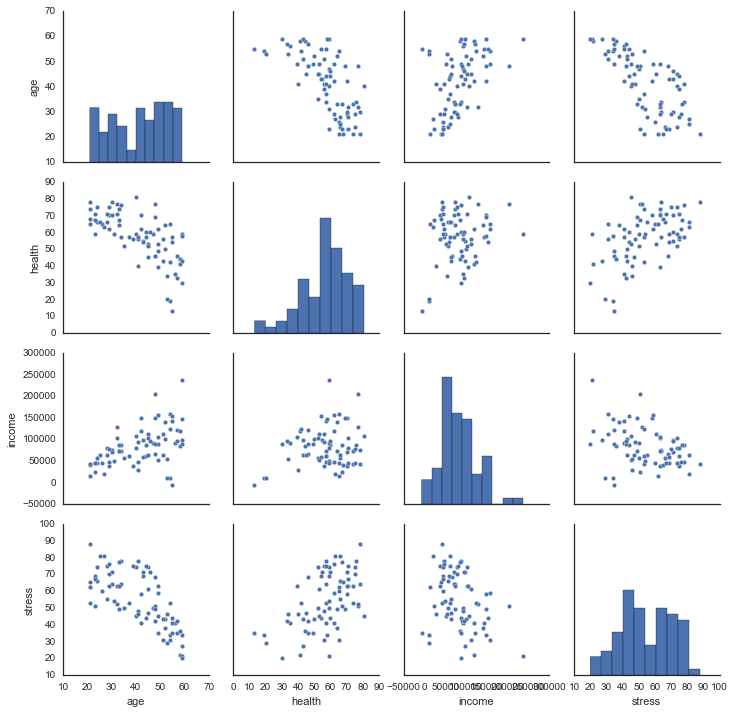

In [2]:
# similar to covariance matrix
demo.head()
sns.pairplot(demo)

In [5]:
# Calculating the correlation matrix
demo_noage = demo[['health','income','stress']]
demo_noage=(demo_noage - demo_noage.mean()) /demo_noage.std()

In [3]:
demo.corr()

,age,health,income,stress
age,1.000000,-0.674142,0.503590,-0.713347
health,-0.674142,1.000000,0.192037,0.527663
income,0.503590,0.192037,1.000000,-0.347925
stress,-0.713347,0.527663,-0.347925,1.000000


In [6]:
demo_noage.cov = demo_noage.cov()
demo_noage.cov 

,health,income,stress
health,1.000000,0.192037,0.527663
income,0.192037,1.000000,-0.347925
stress,0.527663,-0.347925,1.000000


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(demo_noage.cov)

print eigenvalues

print eigenvectors

[ 0.26996948  1.55645677  1.17357375]
[[ 0.59525118 -0.6187659  -0.5126449 ]
 [-0.46791364  0.25173885 -0.84716255]
 [-0.65324793 -0.74414804  0.13968116]]


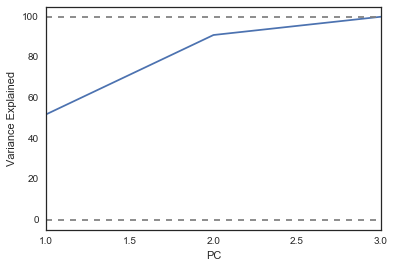

In [8]:
cum_sum = sorted((eigenvalues / eigenvalues.sum() *100),reverse=True)
plt.plot(range(1,4),np.cumsum(cum_sum))
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.ylim((-5,105))
plt.axhline(y=0,color ='grey', ls= 'dashed')
plt.axhline(y=100, color= 'grey', ls = 'dashed')

In [9]:
eigen_pairs = zip(eigenvalues, eigenvectors.T)
eigen_pairs.sort(key=lambda x:x[0],reverse=True)

w = np.hstack((eigen_pairs[0][1].reshape(3,1),
             eigen_pairs[1][1].reshape(3,1)))
              
w

array([[-0.6187659 , -0.5126449 ],
       [ 0.25173885, -0.84716255],
       [-0.74414804,  0.13968116]])

In [11]:
Z =demo_noage.dot(w)

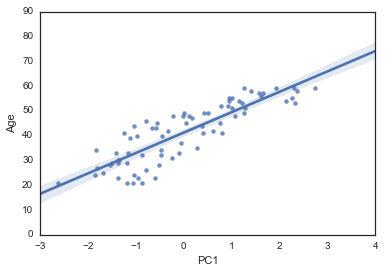

In [12]:
fig =plt.figure()
ax =fig.gca()
sns.regplot(Z.iloc[:,0], demo.age)
ax.set_ylabel("Age")
ax.set_xlabel("PC1")

In [14]:
demo_pcs = demo.copy()
demo_pcs = (demo -demo.mean()) /demo.std()

demo_pcs['PC1'] =Z.loc[:,0]
demo_pcs['PC1'] =Z.loc[:,1]
demo_pcs

,age,health,income,stress,PC1
0,-1.701609,1.163163,-0.894894,-0.084197,0.150070
1,-0.692750,0.472995,-0.219508,-0.327072,-0.102205
2,-0.944964,1.439230,-0.188353,0.583710,-0.496715
3,-0.776821,0.956113,0.449359,0.522991,-0.797774
4,1.324968,-0.769307,0.851048,-1.177134,-0.491018
5,-1.029036,0.887096,-1.005308,0.522991,0.469946
6,0.232038,0.196928,0.092312,-0.630665,-0.267250
7,0.904610,0.472995,1.302526,-0.994978,-1.484910
8,0.484252,0.127911,0.197534,-0.266353,-0.270120
9,-1.281251,0.542012,-0.836090,0.340835,0.478053
